In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
df=pd.read_csv("train.csv")

Reading the file

In [37]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Exploring and understanding the data

In [38]:
df.shape

(891, 12)

In [39]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
df.describe()

#include="all"

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistics of whole data

# DATA CLEANING

In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking if there is any null values present in any of the column

In [42]:
# no duplicated data

df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Making a check if there is any duplicated data present in the dataset

In [43]:
#how many people survived


df['Survived'].sum()

342

<Axes: >

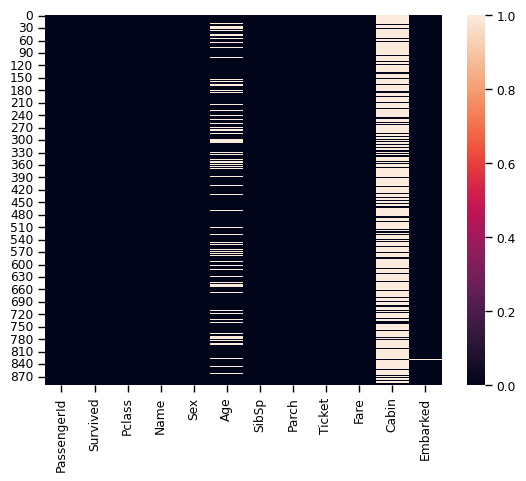

In [44]:
sns.heatmap(df.isnull(),linecolor='white',linewidth = 0)

Showing null values present in dataset using Heatmap and is visible that cabin column is having highest null values

In [45]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Showing the % of null values present in each column

# HANDLE MISSING DATA

In [46]:
# 77% missing values so dropped the whole column

df.drop(['Cabin'],inplace=True,axis=1)

77% missing values present in Cabin column so dropped the whole column

In [47]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

19% missing values are present in Age column so replacing those with the mean of Age column

In [48]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Final check of missing values in the broader picture after the required treatment

# DATA ANALYSIS

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
(df['Survived']== 1).sum() 
print("the people who survived is : " ,(df['Survived']== 1).sum())


(df['Survived']== 0).sum()
print("the people who died is : " ,(df['Survived']== 0).sum())

the people who survived is :  342
the people who died is :  549


Statistics of people who survived/ died during the accident

Text(0.5, 0, 'Survived/Died')

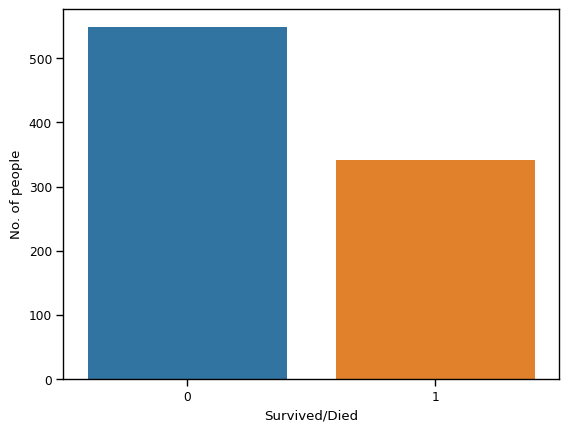

In [51]:
sns.countplot(x= 'Survived', data=df)
plt.ylabel('No. of people')
plt.xlabel('Survived/Died')

Visual representation of stats of people who survived/ died in the accident

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

Exploring the Passenger Class column by broadly checking no. of passenger classes in the train

In [54]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Further exploration of data more precisely Passenger class column by counting no. of people in each class using value_counts function

<Axes: xlabel='Pclass', ylabel='count'>

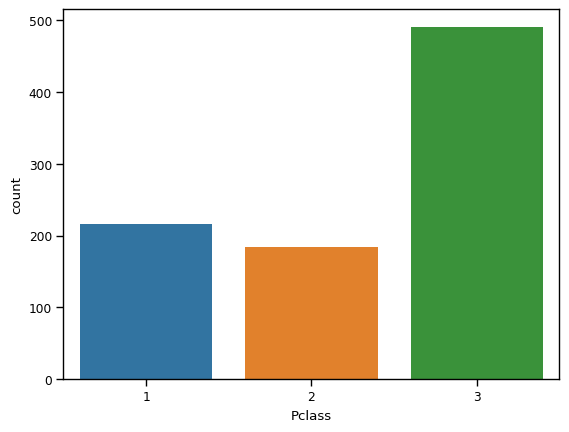

In [55]:
sns.countplot(x='Pclass',data=df)

Visual representation of further data exploration more precisely Passenger class column by counting no. of people in each class using countplot

In [56]:
# Males of age between 22 and 30

df[(df['Sex']=='male') & (df['Age'].between(22,30))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,C
...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S


Analysing the data by checking no. of male passengers present in ship belonging to the the age group of 22-30

<Axes: xlabel='Sex', ylabel='count'>

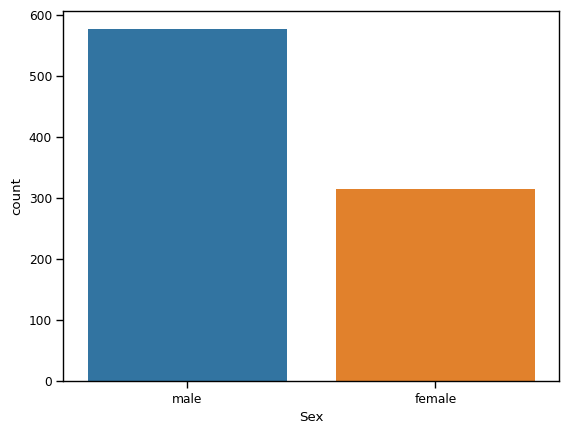

In [57]:
# visualising male and female passengars


sns.countplot(x=df['Sex'],data = df)

Visual representation of Male and Female passengers present in the ship during accident

C:\Users\Get craft\AppData\Local\Temp\ipykernel_8024\3088649846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=5)


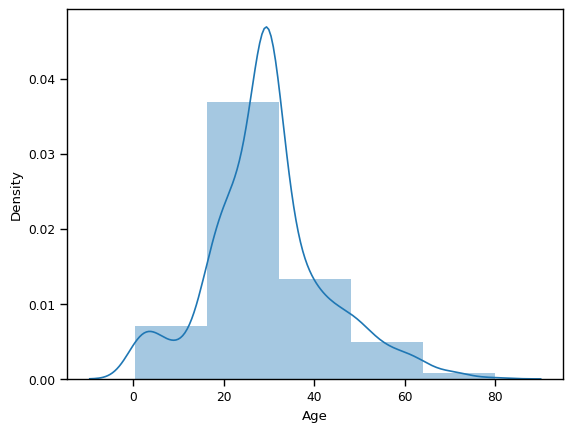

In [58]:
sns.distplot(df['Age'],bins=5)
plt.show()

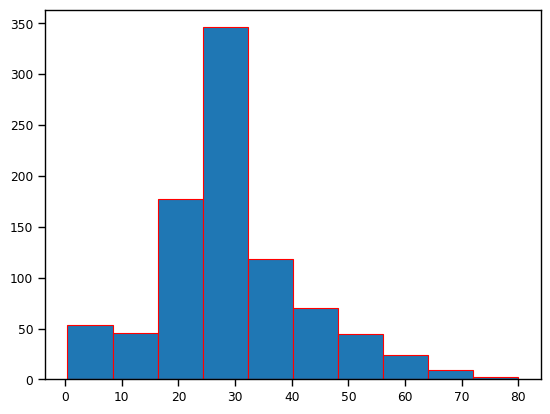

In [59]:
plt.hist(df['Age'],edgecolor='red')
plt.show()

Histogram representing age classification of people in the ship

# BIVARIATE ANALYSIS

<Axes: xlabel='Sex', ylabel='Survived'>

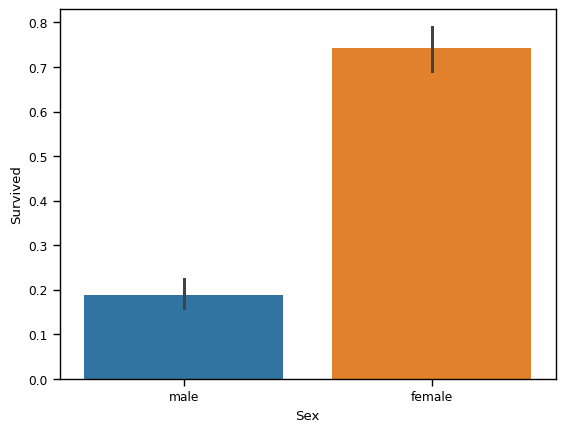

In [60]:
sns.set_context('paper')

sns.barplot(x='Sex',y='Survived',data=df)

It is quite visible from the above graph that female passengers have high survival rate than male passengers

<Axes: xlabel='Pclass', ylabel='Survived'>

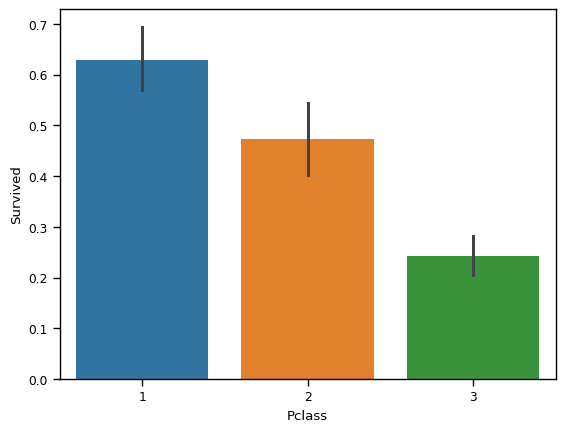

In [61]:
sns.barplot(x='Pclass',y='Survived',data=df)

Above Barplot is visually demonstrating that survival rate of people travelling in first class is more than that of rest 2 classes

In [62]:
# most survival in which pclass


df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Passengers in different class')

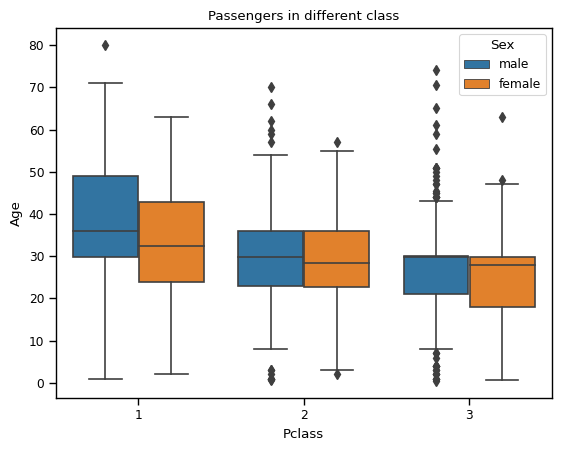

In [63]:
sns.boxplot(x='Pclass' , y='Age' , hue='Sex',data=df)
plt.title('Passengers in different class')

Above Box plot is providing a quick visual summary of the variability of values in the dataset in respect to different Passengar class & Age of people

<Axes: xlabel='Embarked', ylabel='Fare'>

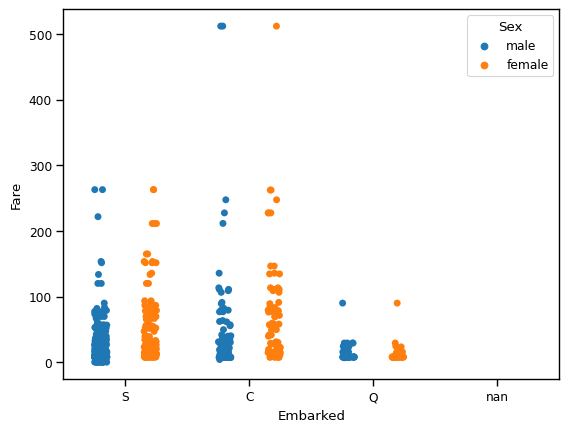

In [64]:
sns.stripplot(x='Embarked',y='Fare',hue='Sex',data=df,dodge=True)

<Axes: xlabel='Embarked', ylabel='Fare'>

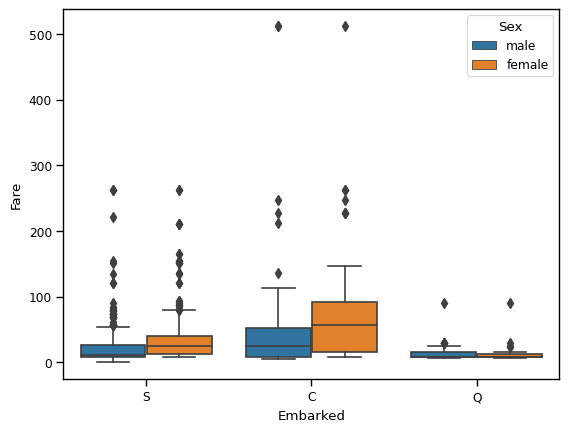

In [65]:
sns.boxplot(x='Embarked',y='Fare',hue='Sex',data=df,dodge=True)

Above Box plot is providing a quick visual summary of the variability of values in the dataset in respect to station they embarked from and respective fare they paid separately for males and females

In [66]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Exploring the Sibling/Spouse column of dataset 

In [67]:
# total siblings/spouse in the ship

df['SibSp'].sum()

466

Checking total siblings/spouse present in the ship

In [68]:
# Finding total siblings & spouses across diff pclasses


df.groupby('Pclass')['SibSp'].sum()

Pclass
1     90
2     74
3    302
Name: SibSp, dtype: int64

Exploring and understanding Sibsp cloumn by checking no. of siblings/spouse present in different passenger classes